In [31]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd

url ="https://www.ptt.cc/bbs/Baseball/index.html"
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text,"html.parser")
articles = soup.find_all("div",class_="r-ent")
data_list = []
for a in articles:
    data = {}
    title = a.find("div",class_="title")
    if title and title.a:
       title = title.a.text
    else:
        title = "沒有標題"
    data["標題"] = title


    popular = a.find("div",class_="nrec")
    if popular and popular.span:
        popular = popular.span.text
    else:
        popular = "N/A"
    data["人氣"] = popular
    date = a.find("div",class_="date")
    if date:
        date = date.text
    else:
        date = "N/A"
    data["日期"] = date
    data_list.append(data)
with open("ptt_baseball_data", "w",encoding="utf-8") as file:
     json.dump(data_list,file,ensure_ascii=False,indent=4)
print("成功儲存成JSON")

df = pd.DataFrame(data_list)

# Save to CSV
df.to_csv("ptt_baseball_data.csv", index=False, encoding="utf-8-sig")



成功儲存成JSON


In [32]:
from google.colab import auth
auth.authenticate_user()

import google.auth
from google.auth.transport.requests import Request
from google.colab import auth
from oauth2client.client import GoogleCredentials
from gspread import authorize

creds, _ = google.auth.default()
gc = authorize(creds)

In [ ]:
def df_to_sheets(df, spreadsheet_id, sheet_name):
  try:
    sh = gc.open_by_key(spreadsheet_id)
  except Exception as e:
    print(f"Error opening the Spreadsheet: {e}")
    return

  try:
    worksheet = sh.worksheet(sheet_name)
  except gspread.WorksheetNotFound:
    worksheet = sh.add_worksheet(title=sheet_name, rows="100", cols="20")

  worksheet.update([df.columns.values.tolist()] + df.values.tolist())

In [ ]:
spreadsheet_id = '1cO8l9yoDuB9RKVtBbixyNsV7zhMOJcKUGNELeKwSCdQ'
sheet_name = 'HW4'

def truncate_to_limit(cell_value, limit=10000):
  if len(cell_value) > limit:
    return cell_value[:limit] + '... [內容過長，已停止寫入]'
  else:
    return cell_value

In [ ]:
df_truncated = df.applymap(lambda x: truncate_to_limit(str(x)))
df_truncated


,標題,人氣,日期
0,[分享] CPBL戰績,67,5/01
1,[分享] 今日許峻暘(ERA 2.08 WHIP 3.00),36,5/01
2,[分享] CPBL戰績(2024/5/1)含扣掉台鋼戰績,27,5/01
3,[討論] 裴瑞茲頭部觸身後的反應,31,5/01
4,[分享] 今日陳重廷 單場MVP,48,5/01
5,[新聞] 滿場球探盯古林5局7K失1分好投 雄鷹「誤」事遭獅狠咬,34,5/01
6,[新聞] 中職／投到抽筋差點被換 魏碩成阻止王建,7,5/01
7,[討論] 台鋼最大的問題是守備吧,10,5/01
8,[分享] 中職35年失誤塔 ~05/01,14,5/01
9,[分享] 今日王柏融,27,5/01


In [ ]:
df_to_sheets(df_truncated, spreadsheet_id, sheet_name)


In [ ]:
!pip install transformers torch

In [ ]:
import getpass
import os
os.environ["HUGGINGFACE_API_KEY"] = getpass.getpass()

··········


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1cO8l9yoDuB9RKVtBbixyNsV7zhMOJcKUGNELeKwSCdQ/edit#gid=0')
# 從 gsheets 的工作表
sheets1 = gsheets.worksheet('HW4').get_all_values()

df = pd.DataFrame(sheets1[1:], columns=sheets1[0])

In [ ]:
df.head()


,標題,人氣,日期
0,[分享] CPBL戰績,67,5/01
1,[分享] 今日許峻暘(ERA 2.08 WHIP 3.00),36,5/01
2,[分享] CPBL戰績(2024/5/1)含扣掉台鋼戰績,27,5/01
3,[討論] 裴瑞茲頭部觸身後的反應,31,5/01
4,[分享] 今日陳重廷 單場MVP,48,5/01


In [ ]:
import re
# 只保留中文字
def keep_chinese_chars(text):
    pattern = re.compile(r'[^\u4e00-\u9fff]')
    chinese_text = re.sub(pattern, '', text)
    chinese_text = chinese_text.replace("推推", "")
    return chinese_text

In [ ]:
text = df['標題'][0]
text = keep_chinese_chars(text)
text

'分享戰績'

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def Mistral_summarize(text):

  device = "cuda" # the device to load the model onto

  model = AutoModelForCausalLM.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")
  tokenizer = AutoTokenizer.from_pretrained("MediaTek-Research/Breeze-7B-Instruct-v1_0")

  messages = [
      {"role": "user", "content": "What is your favourite condiment?"},
      {"role": "assistant", "content": "Well, I'm quite partial to a good squeeze of fresh lemon juice. It adds just the right amount of zesty flavour to whatever I'm cooking up in the kitchen!"},
      {"role": "user", "content": {text}}
  ]

  encodeds = tokenizer.apply_chat_template(messages, return_tensors="pt")

  model_inputs = encodeds.to(device)

  generated_ids = model.generate(model_inputs, max_new_tokens=1000, do_sample=True)
  decoded = tokenizer.batch_decode(generated_ids)

  return decoded

In [ ]:
from transformers import BertTokenizer, BertModel, BertForMaskedLM
import torch

def bart_summarize(text):

    keep_chinese_chars(text)

    tokenizer = BertTokenizer.from_pretrained('hfl/chinese-bert-wwm')
    model = BertForMaskedLM.from_pretrained('hfl/chinese-bert-wwm')

    inputs = tokenizer(text, return_tensors="pt", max_length=100, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=128)

    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

In [ ]:
summary = bart_summarize(text)
print(summary)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/412M [00:00<?, ?B/s]

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


分 享 戰 績 facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook facebook fa

In [ ]:
def remove_spaces(text):
    # 使用 replace 方法來刪除空格
    return text.replace(" ", "")

output_text = remove_spaces(summary)
output_text

'分享戰績facebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebook分享戰績'

In [ ]:
import jieba
import jieba.analyse

jieba.analyse.extract_tags(output_text, topK=10)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 1.600 seconds.
DEBUG:jieba:Loading model cost 1.600 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


['戰績',
 '分享',
 'facebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebookfacebook']

In [33]:
# 使用 jieba 提取關鍵字
def extract_keywords(text):
    #text = keep_chinese_chars(text)

    summary = bart_summarize(text)
    outputt_ext = remove_spaces(summary)

    return jieba.analyse.extract_tags(outputt_ext, topK=10)  # 提取前十個關鍵字

df['keywords'] = df['標題'].apply(extract_keywords)

Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at hfl/chinese-bert-wwm were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a m

In [34]:
df.head()

,標題,人氣,日期,keywords
0,[分享] 在熊本看九州獨立聯盟開幕戰,2,5/01,"[熊本, 獨立, 聯盟, 開幕戰, 九州, 分享]"
1,Re: [討論] 今日爪龍戰的球衣顏色,2,5/01,"[nba, re, 討論, 爪龍戰, 球衣, 顏色, category, 今日]"
2,Re: [新聞] 強調「打職棒的危機意識」 玉木朋孝盼台灣,3,5/01,"[玉木, re, 新聞, 強調, 打職, 危機, 意識, 朋孝盼, 台灣, taiwanta..."
3,[分享] 張育成 FB - 搖頭公仔預購資訊,7,5/01,"[facebook, 公仔, fb, 搖頭, 預購, 資訊, 育成, 分享]"
4,[分享] 今日葉保弟,6,5/01,"[葉保弟, 分享, 今日]"


In [35]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from community import community_louvain

In [36]:
G = nx.Graph()

for index, row in df.iterrows():
    author = row['標題']
    keywords = row['keywords']

    G.add_node(author, type='author')

    for keyword in keywords:
        G.add_node(keyword, type='keyword')
        G.add_edge(author, keyword)

In [37]:
keywords

['taipei', 'live', '味全', '天母', 'cpbl', '066', 'vs', '中信', '兄弟']

In [38]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib as mpl
from matplotlib.font_manager import fontManager
# 改style要在改font之前
# plt.style.use('seaborn')
fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2024-05-01 15:47:54--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.219.102, 172.217.219.113, 172.217.219.101, ...
Connecting to drive.google.com (drive.google.com)|172.217.219.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2024-05-01 15:47:54--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.171.132, 2607:f8b0:4001:c5f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.171.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  82.5MB/s    in 0.2s    

2024-05-01 

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:450: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


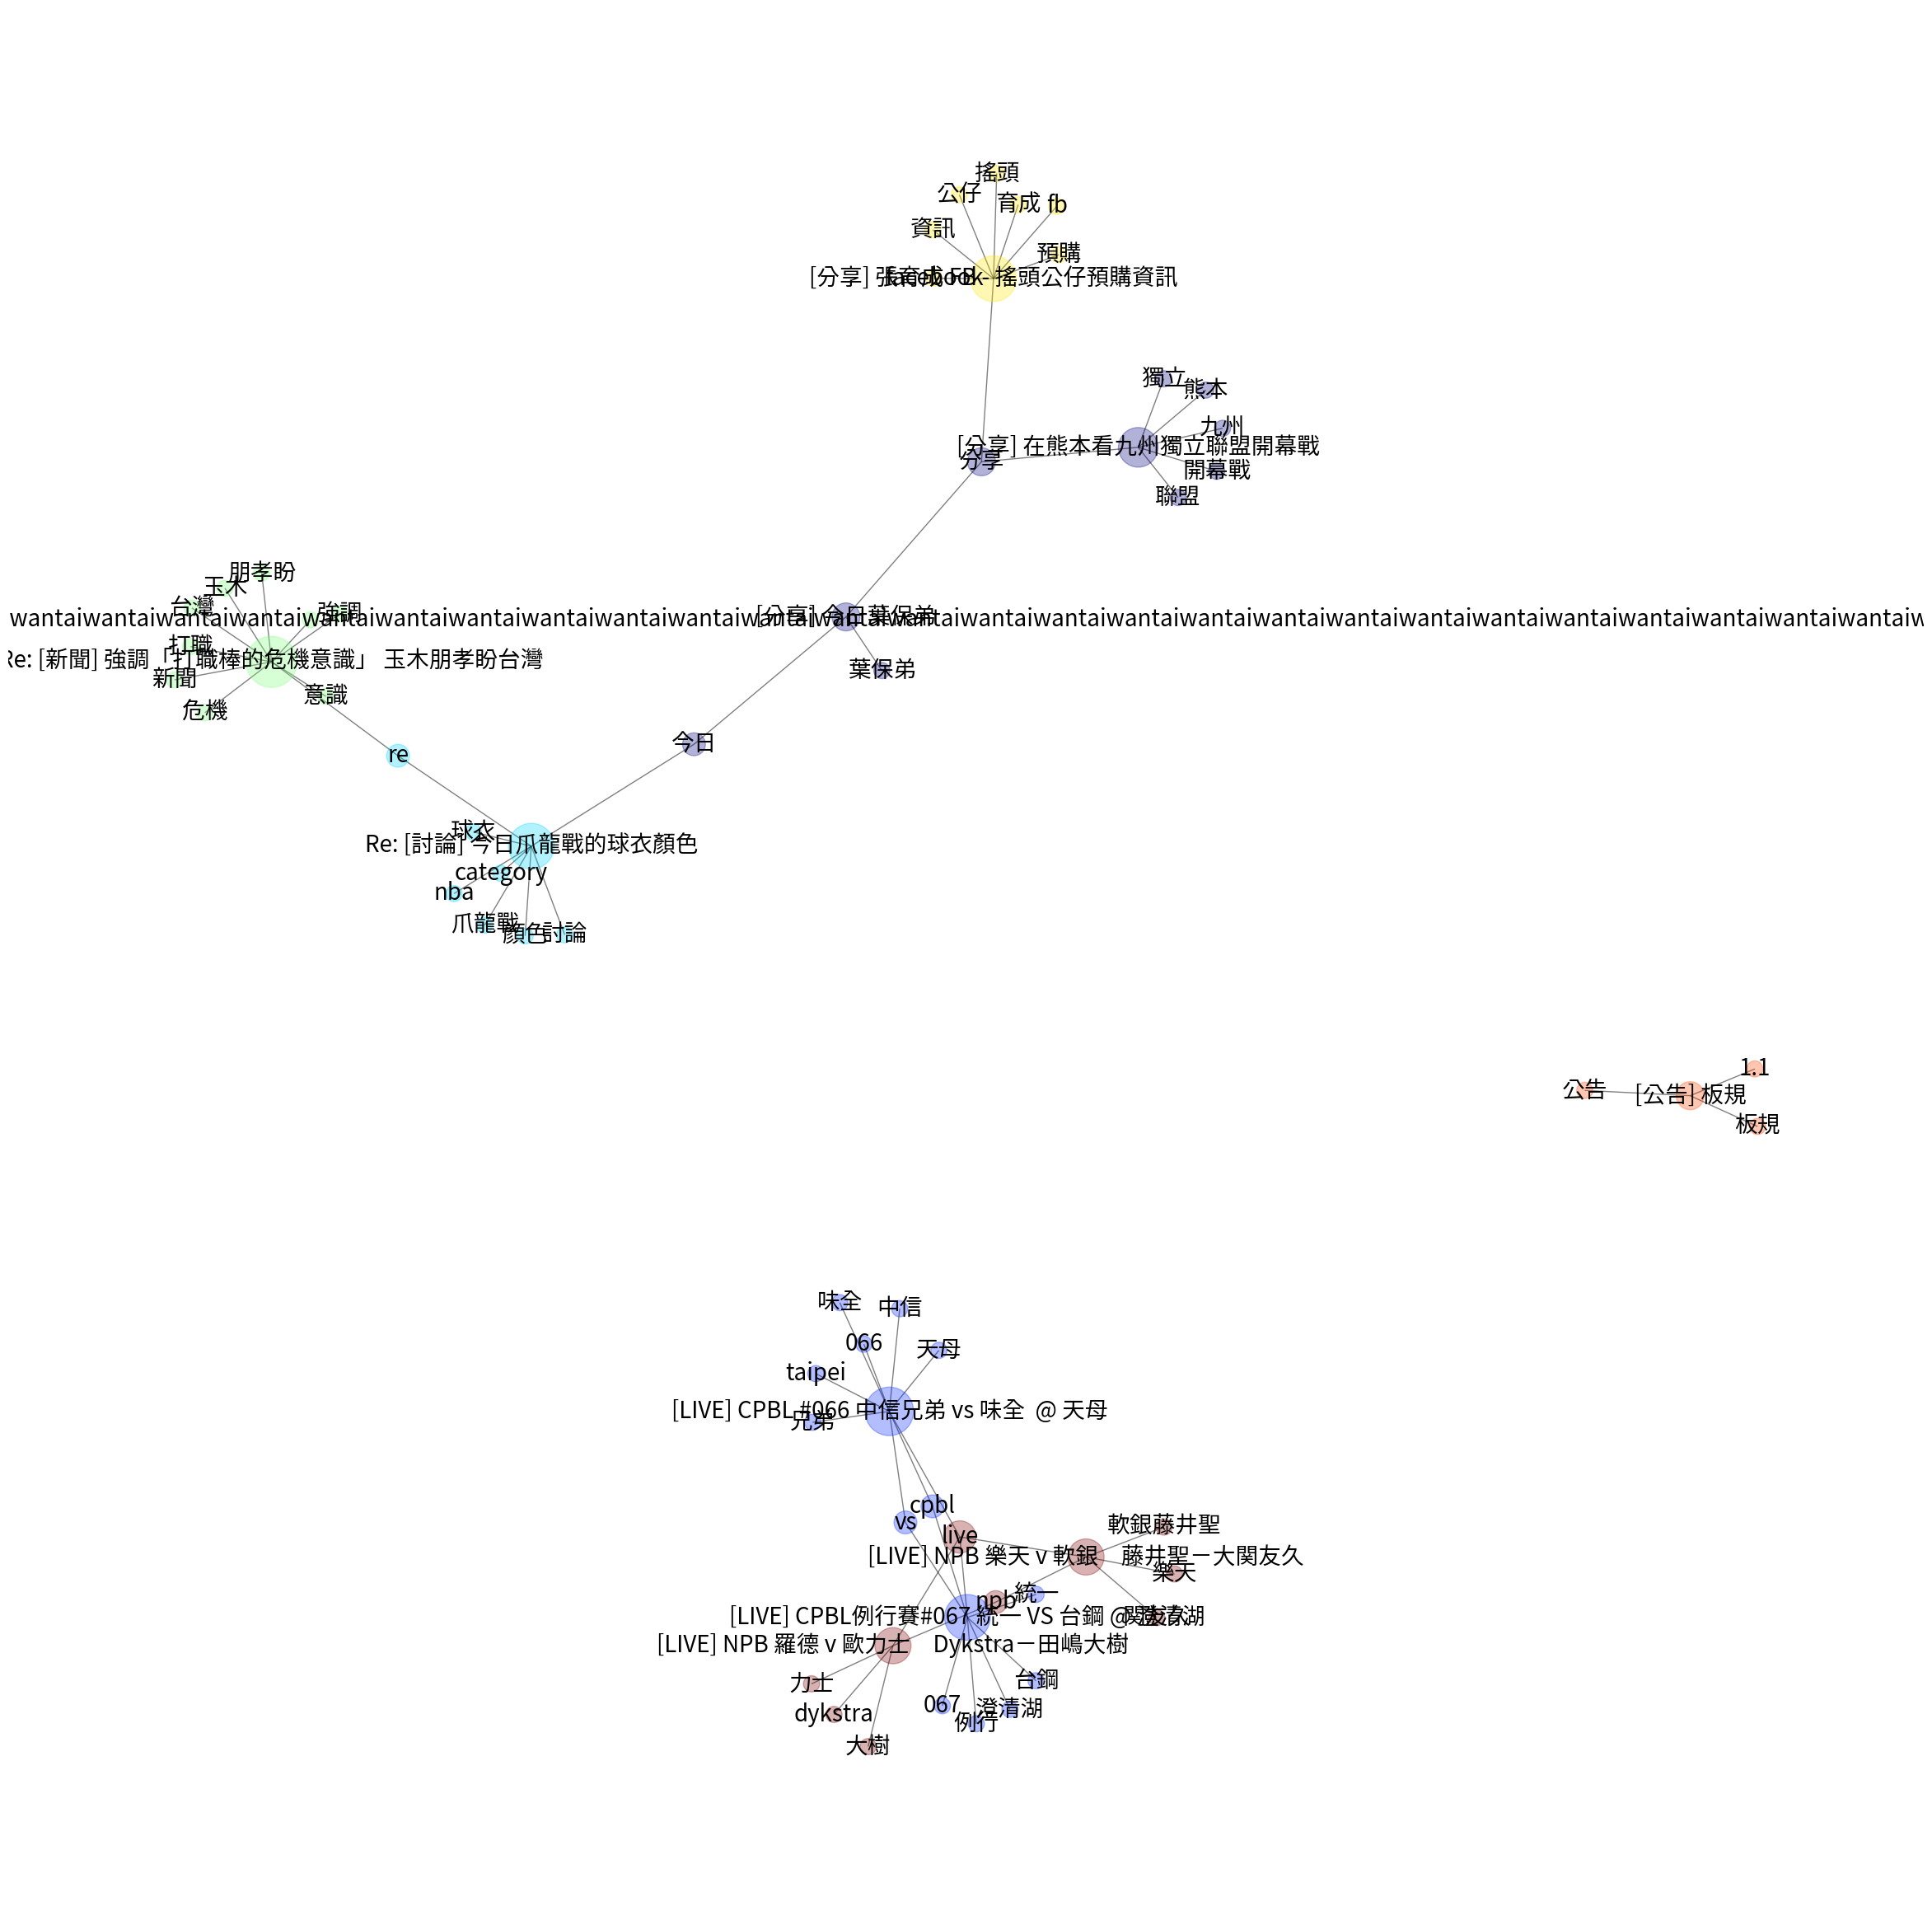

In [39]:
partition = community_louvain.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

cmap = plt.cm.jet
colors_with_alpha = [cmap(community_color / max(community_colors)) for community_color in community_colors]

colors_with_alpha = [(r, g, b, 0.3) for r, g, b, _ in colors_with_alpha]

node_sizes = [200 * G.degree(node) for node in G.nodes()]

pos = nx.spring_layout(G, k=0.2, iterations=80)

plt.figure(figsize=(30, 30))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color=colors_with_alpha, node_size=node_sizes, cmap=plt.cm.jet)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='Taipei Sans TC Beta')

plt.axis('off')
plt.show()